<a href="https://colab.research.google.com/github/WandersonClayton/data_analysis/blob/main/titanic_score_0_7416_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# <font color="#F24405">Titanic Score 0,7416 Logistic Regression</font>
<hr color="#0CABA8" size="1">


**Por: [Wanderson Clayton](https://www.linkedin.com/in/wandersonclayton3/)**

<span>
  <a href="https://api.whatsapp.com/send?phone=5534998771247">
    <img src="https://img.icons8.com/material-outlined/24/000000/whatsapp.png"/>
  </a>
  <a href="https://www.linkedin.com/in/wandersonclayton3">
    <img src="https://img.icons8.com/material-outlined/24/000000/linkedin.png"/>
  </a>
  <a href="https://github.com/WandersonClayton">
    <img src="https://img.icons8.com/material-outlined/24/000000/github.png"/>
  </a>
</span>

<hr color="#F5F5F5" size="2">

"Este notebook tem como objetivo realizar a análise de dados e aplicar modelo de machine learning para prever, com base em diversos fatores, quais pessoas sobreviveram ou não ao desastre."

<div style="display:inline-block;vertical-align:top;">
<h2>Sumário:</h2>
<ul>
    <li><a href="#contexto-projeto">1. Sobre o contexto do projeto </a></li>
    <li><a href="#install-pack">2. Instalação e carregamento de pacotes </a></li>
    <li><a href="#conhecendo_dados">3. Carregando e conhecendo dados </a></li>
    <li><a href="#limpando_dados">4. Limpeza de dados </a></li>
    <li><a href="#explorando_dados">5. Análise Exploratória de dados (EDA)</a></li>
    <li><a href="#preparar_modelagem">6. Preparar dados para modelagem </a></li>
    <li><a href="#aplicando_logisicRegression">7. Criando modelo de machine learning (Regressão Logistica)</a></li>
    <li><a href="#submission">8. Realizando submissão do projeto</a></li>
    <li><a href="#relatorio">9. Relatório</a></li>
</ul>
</div>

<a id='contexto-projeto'></a>
# <font color="#FA7F08">1. Sobre o Contexto do Projeto</font>
<hr color="#F5F5F5" size="1">

### <font color="#22BABB">Realizar analise afim de identificar quais pessoas sobreviveram ou não ao desastre com base entre diversos fatores.</font>

O naufrágio do Titanic é um dos naufrágios mais infames da história.

Em 15 de abril de 1912, durante sua viagem inaugural, o amplamente considerado “inafundável” RMS Titanic afundou após colidir com um iceberg. Infelizmente, não havia botes salva-vidas suficientes para todos a bordo, resultando na morte de 1.502 dos 2.224 passageiros e tripulantes.

Embora houvesse algum elemento de sorte envolvido na sobrevivência, parece que alguns grupos de pessoas eram mais propensos a sobreviver do que outros.

Neste desafio, pedimos que você construa um modelo preditivo que responda à pergunta: “que tipo de pessoa tem maior probabilidade de sobreviver?” usando os dados do passageiro (ou seja, nome, idade, sexo, classe socioeconômica, etc).

<div class="alert alert-info">
<strong><div style="color: rgb(0, 0, 0);">📌 Os principais objetivos na aprendizagem deste projeto: </div></strong> <br>
<div style="color: rgb(0, 0, 0);">→ Realizar limpeza e tratamento de dados; </div>
<div style="color: rgb(0, 0, 0);">→ Realizar análise exploratória;</div>
<div style="color: rgb(0, 0, 0);">→ Aplicar modelo de machine learning de regressão logística; e</div>
<div style="color: rgb(0, 0, 0);">→ Desenvolver relatório com pontos importantes para os tomadores de decisões.</div>
</div>

<a id='descricao-variaveis'></a>
### <font color="#F24405"> Descrição das Variáveis do Dataset</font>
<hr color="#F5F5F5" size="1">

| Variável | Descrição |
| --- | --- |
| **PassengerId** | Identificador único para cada candidato |
| **Survived** | Sobrevivência; 0 = Não, 1 = Sim |
| **pclass** | Classe socioeconômica; 1 = Superior; 2 = Médio; 3 = Baixo |
| **sex** | Gênero do passageiro |
| **Age** | Idade |
| **sibsp** | Nº de irmãos/cônjuges a bordo do Titanic |
| **parch** | Nº de pais/filhos a bordo do Titanic |
| **ticket** | Número do bilhete |
| **fare** | Tarifa de passageiro |
| **cabin** | Número da cabine |
| **embarked** | Porto de embarcação	C = Cherbourg, Q = Queenstown, S = Southampton |


<a id='install-pack'></a>
# <font color="#FA7F08">1. Instalação e carregamento de pacotes</font>
<hr color="#F5F5F5" size="1">

In [6]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('/kaggle/input/module-da/')

import data_type_conversion
import missing_values
import outlier_treatment

import seaborn as sns
import matplotlib.pyplot as plt
import re

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

#Pck para ignorar Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

print('import de pack - ok!')



import de pack - ok!


<a id='conhecendo_dados'></a>
# <font color="#FA7F08">3. Carregando e conhecendo dados</font>
<hr color="#F5F5F5" size="1">


In [7]:

df_titanic_test = pd.read_csv('/content/test.csv')
df_titanic_traim = pd.read_csv('/content/train.csv')
df_titanic_traim.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df_titanic_traim.shape

(891, 12)

In [9]:
df_titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
df_titanic_test.shape

(418, 11)

<a id='limpando_dados'></a>
# <font color="#FA7F08">4. Limpeza de dados</font>
<hr color="#F5F5F5" size="1">


In [11]:
missing_values.drop_duplicates(df_titanic_traim)

Nenhuma linha duplicada foi encontrada.


In [12]:

missing_values.func_calc_percentual_valores_ausentes_linha(df_titanic_traim)


79.46 % das linhas no conjunto de dados contêm pelo menos um valor ausente.


In [13]:

 missing_values.func_calc_percentual_valores_ausentes_coluna(df_titanic_traim)

O dataset tem 12 colunas.
Encontrado: 3 colunas que têm valores ausentes.


,Valores Ausentes,% de Valores Ausentes,Dtype
Cabin,687,77.10,object
Age,177,19.87,float64
Embarked,2,0.22,object


Considerando que a coluna ***Cabin*** possui 77,10 % de valores ausente, podemos simplismente remover do nosso conjunto de dados, visto que tem muito pouca imformação.

In [14]:
df_titanic_traim.drop(['Cabin'], axis=1, inplace=True)


In [15]:
missing_values.func_calc_percentual_valores_ausentes_linha(df_titanic_traim)
missing_values.func_calc_percentual_valores_ausentes_coluna(df_titanic_traim)

20.09 % das linhas no conjunto de dados contêm pelo menos um valor ausente.
O dataset tem 11 colunas.
Encontrado: 2 colunas que têm valores ausentes.


,Valores Ausentes,% de Valores Ausentes,Dtype
Age,177,19.87,float64
Embarked,2,0.22,object


In [16]:
df_titanic_traim.shape

(891, 11)

In [17]:
df_titanic_traim.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


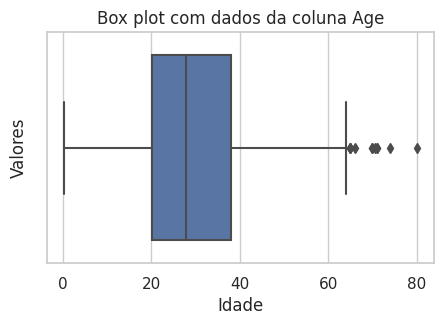

In [18]:


sns.set(style="whitegrid")

plt.figure(figsize=(5, 3))

sns.boxplot(x=df_titanic_traim['Age'])

plt.title("Box plot com dados da coluna Age")
plt.xlabel("Idade")
plt.ylabel("Valores")

plt.show()

In [19]:
q3 = df_titanic_traim['Age'].quantile(0.75)
q1 = df_titanic_traim['Age'].quantile(0.25)

iqr = q3-q1

limite_max = q3+(1.5*iqr)
print("Limite Max",limite_max)

Limite Max 64.8125


In [20]:
df_titanic_traim.loc[df_titanic_traim['Age'] > limite_max, 'Age'] = limite_max

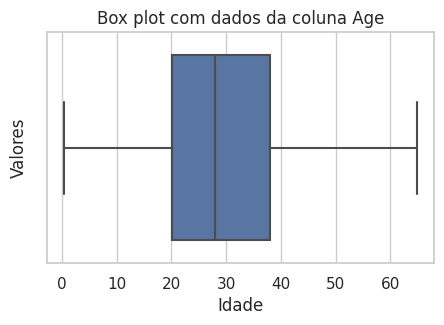

In [21]:
sns.set(style="whitegrid")

plt.figure(figsize=(5, 3))

sns.boxplot(x=df_titanic_traim['Age'])

plt.title("Box plot com dados da coluna Age")
plt.xlabel("Idade")
plt.ylabel("Valores")

plt.show()

In [22]:
# Imputação usando a mediana
missing_values.fix_missing_median(df_titanic_traim, "Age")

177 valores ausentes na coluna Age foram substituídos por seu valor de mediana 28.0.


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [23]:
missing_values.func_calc_percentual_valores_ausentes_coluna(df_titanic_traim)
print("----")
missing_values.func_calc_percentual_valores_ausentes_linha(df_titanic_traim)

O dataset tem 11 colunas.
Encontrado: 1 colunas que têm valores ausentes.
----
0.22 % das linhas no conjunto de dados contêm pelo menos um valor ausente.


Como o numero de valores ausente agora é muito baixo(0,22%) quando comparado a quantidade de informações que temos, podemos elimitar essas 2 linhas

In [24]:
missing_values.drop_rows_with_missing_values(df_titanic_traim)

2 linhas contendo valores ausentes foram descartadas.


In [25]:
missing_values.func_calc_percentual_valores_ausentes_coluna(df_titanic_traim)
print("----")
missing_values.func_calc_percentual_valores_ausentes_linha(df_titanic_traim)

O dataset tem 11 colunas.
Encontrado: 0 colunas que têm valores ausentes.
----
0.0 % das linhas no conjunto de dados contêm pelo menos um valor ausente.


In [26]:
df_titanic_traim.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Verificar se há falta de informação, visto que os valores ausentes já foram tratados

### Colunas Categóricas


In [27]:
def contar_valores_semelhantes(dataframe, nome_coluna):
    coluna = dataframe[nome_coluna]
    contagem_valores = coluna.value_counts()

    print("Contagem de valores semelhantes na coluna '{}':".format(nome_coluna))
    print(contagem_valores)

In [28]:
contar_valores_semelhantes(df_titanic_traim, "Ticket")

Contagem de valores semelhantes na coluna 'Ticket':
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 680, dtype: int64


In [29]:
contar_valores_semelhantes(df_titanic_traim, "Embarked")

Contagem de valores semelhantes na coluna 'Embarked':
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [30]:
contar_valores_semelhantes(df_titanic_traim, "Sex")

Contagem de valores semelhantes na coluna 'Sex':
male      577
female    312
Name: Sex, dtype: int64


### Colunas Númericas


In [31]:
df_titanic_traim["Fare"].describe()


count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

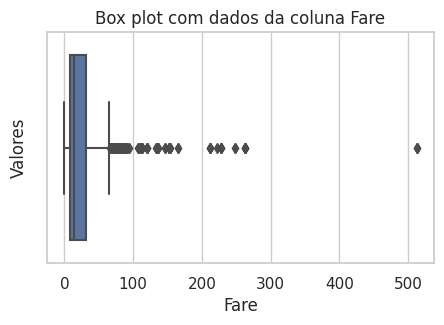

In [32]:
sns.set(style="whitegrid")

plt.figure(figsize=(5, 3))

sns.boxplot(x=df_titanic_traim['Fare'])

plt.title("Box plot com dados da coluna Fare")
plt.xlabel("Fare")
plt.ylabel("Valores")

plt.show()

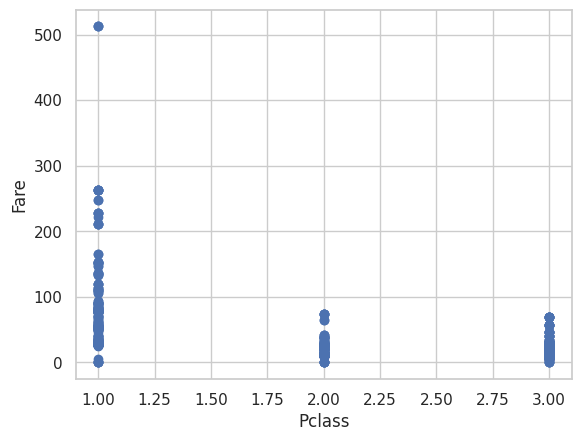

In [33]:

# Criar o gráfico de dispersão
plt.scatter(df_titanic_traim['Pclass'], df_titanic_traim['Fare'])

# Adicionar rótulos aos eixos
plt.xlabel('Pclass')
plt.ylabel('Fare')

# Exibir o gráfico
plt.show()

In [34]:
q3_Fare = df_titanic_traim['Fare'].quantile(0.75)
q1_Fare = df_titanic_traim['Fare'].quantile(0.25)

iqr_Fare = q3-q1

limite_max_Fare = q3_Fare+(1.5*iqr_Fare)
print("Limite Max fare",limite_max_Fare)

Limite Max fare 57.8125


In [35]:
df_titanic_traim.loc[df_titanic_traim['Fare'] > limite_max_Fare, 'Fare'] = limite_max_Fare

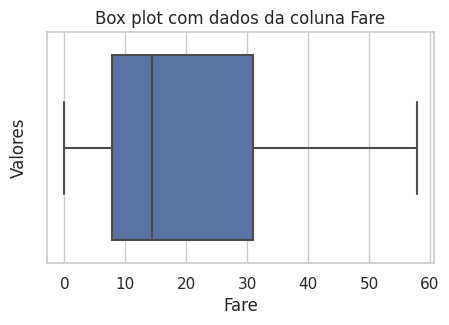

In [36]:
sns.set(style="whitegrid")

plt.figure(figsize=(5, 3))

sns.boxplot(x=df_titanic_traim['Fare'])

plt.title("Box plot com dados da coluna Fare")
plt.xlabel("Fare")
plt.ylabel("Valores")

plt.show()

In [37]:
df_titanic_traim.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,57.8125,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<div class="alert alert-success">
    <strong><div style="color: rgb(0, 0, 0);"><strong>Resumo limpeza de dados:</strong></div></strong> <br>
    <div style="color: rgb(0, 0, 0);"> ✔️ Verificado possiveis valores duplicados</div>
    <div style="color: rgb(0, 0, 0);"> ✔️ Exclusão da coluna <strong>Cabin</strong> porque possui 70,10% de valores ausente, ou seja, falta muita informação.</div>
    <div style="color: rgb(0, 0, 0);"> ✔️ Realizado o tratamento de outlier na coluna <strong>Age</strong> e fazendo imputação de valores usando mediana.  </div>
    <div style="color: rgb(0, 0, 0);"> ✔️ Realizado exclusão de 2 linhas do dataset, visto que esse representa 0,22% de possivel informação.</div>
    <div style="color: rgb(0, 0, 0);"> ✔️ Realizado o tratamento de outlier na coluna <strong>Fare</strong>.</div>

</div>


<a id='explorando_dados'></a>
# <font color="#FA7F08">5. Análise Exploratória de dados (EDA)</font>
<hr color="#F5F5F5" size="1">

In [38]:
df_titanic_traim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


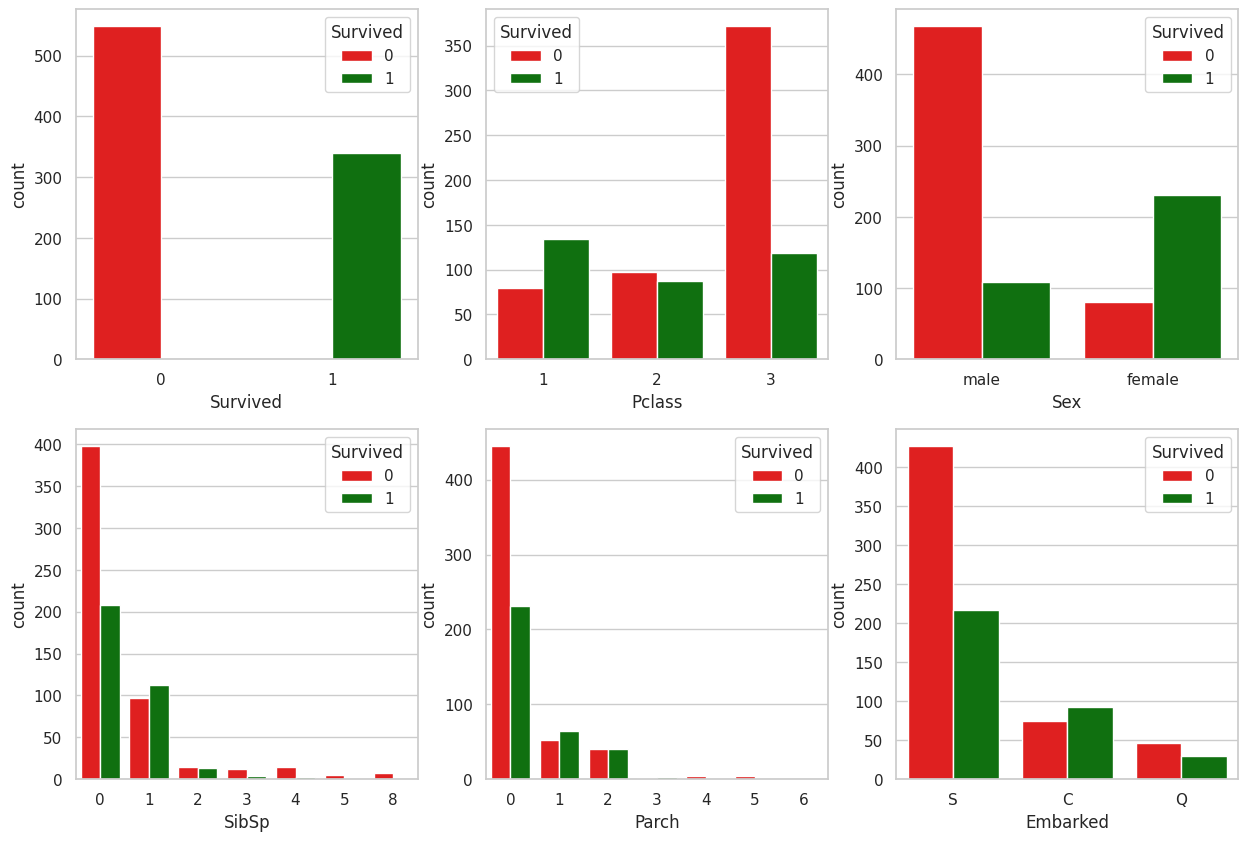

In [39]:
columns = ["Survived", "Pclass", "Sex", "SibSp", "Parch", "Embarked"]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
colors = ["red", "green"]  # Cores das barras
for col, ax in zip(columns, axes.flatten()):
    sns.countplot(x=col, data=df_titanic_traim, hue="Survived", ax=ax, palette=colors)


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 9.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 16.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


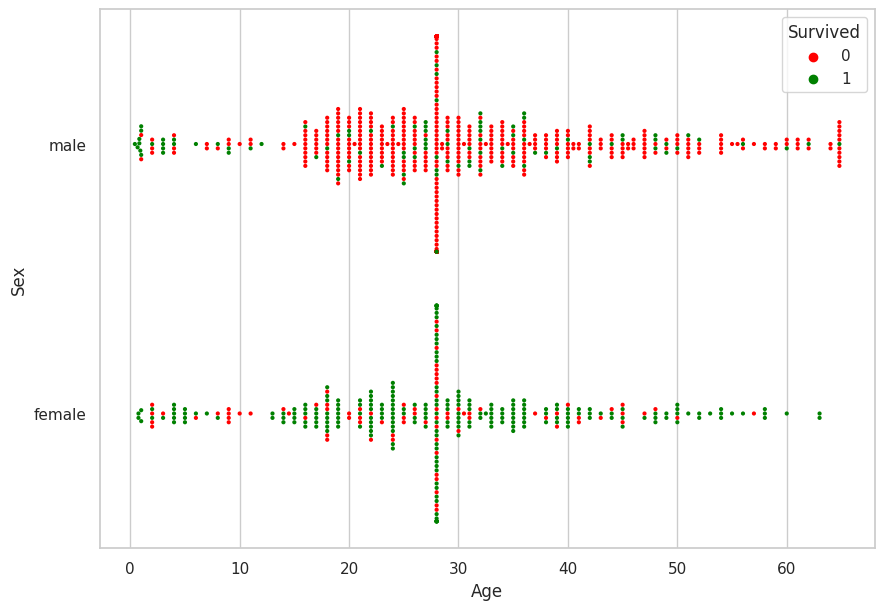

In [40]:




plt.figure(figsize=(10, 7))
#sns.swarmplot(x=categories, y=values)
colors = ["red", "green"]
sns.swarmplot(data=df_titanic_traim, x="Age", y="Sex", hue="Survived", palette=colors, size=3)
#sns.stripplot(data=df_titanic_traim, x="Age", y="Sex", hue="Survived", palette=colors, size=4)

plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 52.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 46.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 69.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 72.0% of the points cannot be plac

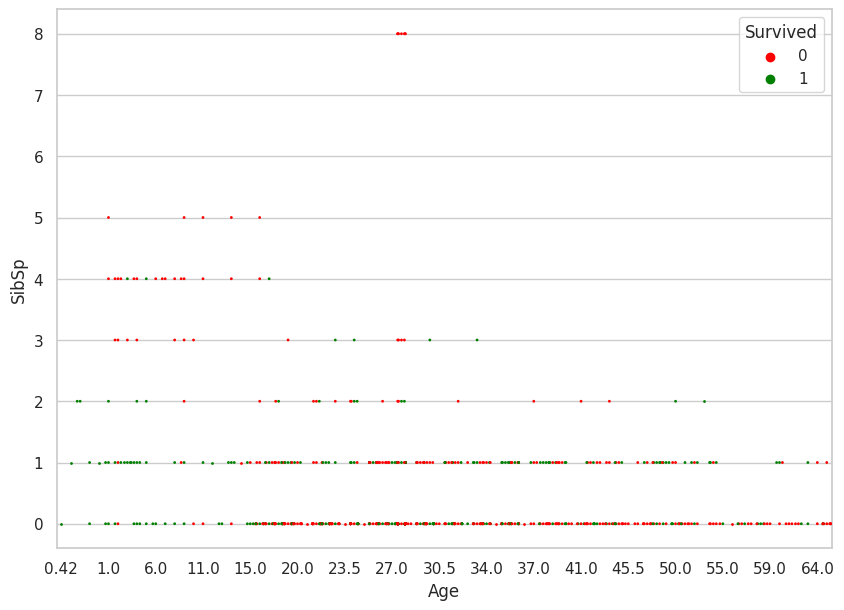

In [74]:
import matplotlib.ticker as ticker

#Nº de irmãos/cônjuges a bordo do Titanic
plt.figure(figsize=(14, 7))
#sns.swarmplot(x=categories, y=values)
colors = ["red", "green"]
sns.swarmplot(data=df_titanic_traim, x="Age", y="SibSp", hue="Survived", palette=colors, size=3)
#sns.stripplot(data=df_titanic_traim, x="Age", y="Sex", hue="Survived", palette=colors, size=3)

ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 37.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 52.9% of the points cannot be plac

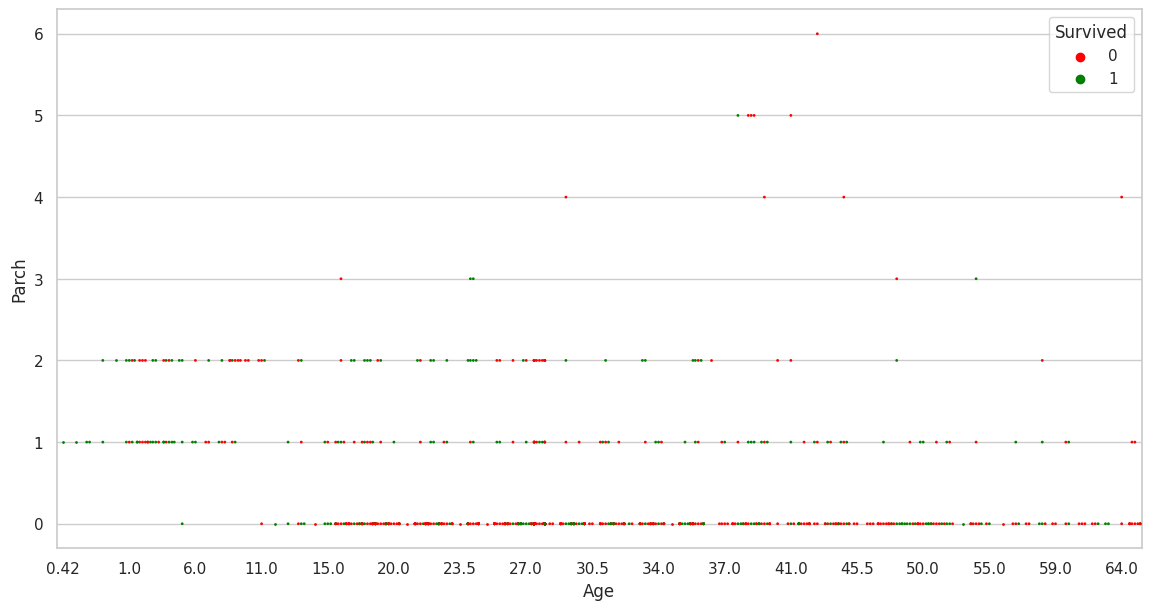

In [75]:
#Nº de pais/filhos a bordo do Titanic
plt.figure(figsize=(14, 7))
#sns.swarmplot(x=categories, y=values)
colors = ["red", "green"]
sns.swarmplot(data=df_titanic_traim, x="Age", y="Parch", hue="Survived", palette=colors, size=3)
#sns.stripplot(data=df_titanic_traim, x="Age", y="Sex", hue="Survived", palette=colors, size=4)

ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 5.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 12.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 20.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


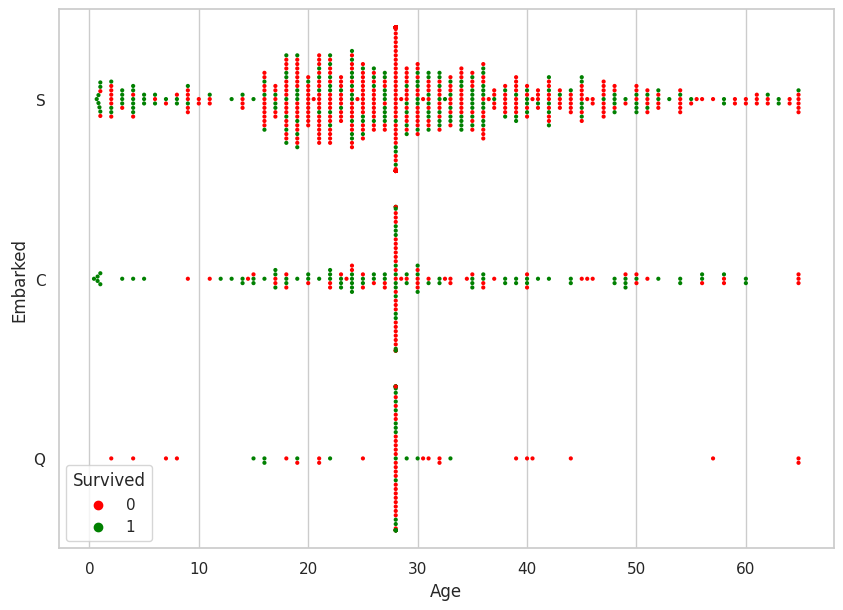

In [43]:
plt.figure(figsize=(10, 7))
#sns.swarmplot(x=categories, y=values)
colors = ["red", "green"]
sns.swarmplot(data=df_titanic_traim, x="Age", y="Embarked", hue="Survived", palette=colors, size=3)
#sns.stripplot(data=df_titanic_traim, x="Age", y="Sex", hue="Survived", palette=colors, size=4)

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 62.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 32.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 76.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 57.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


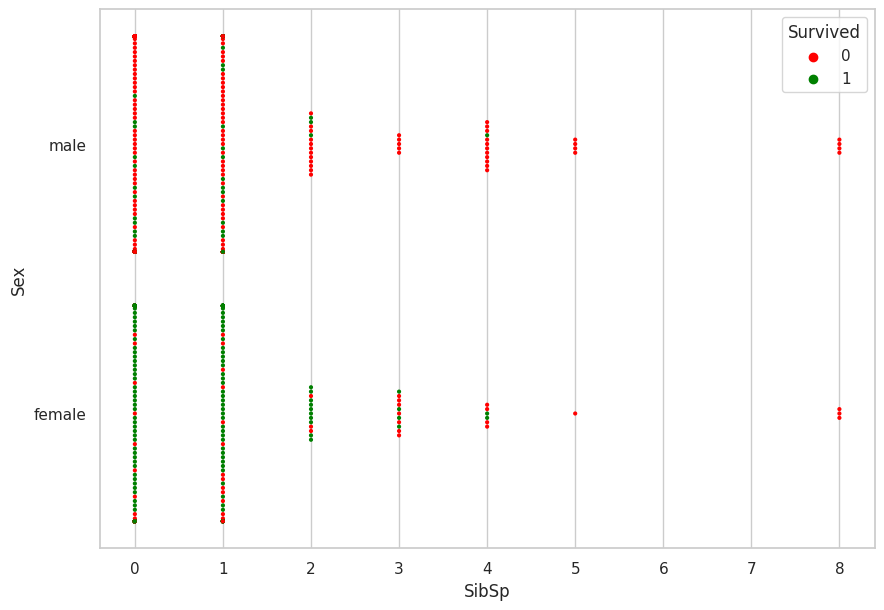

In [44]:
plt.figure(figsize=(10, 7))
#sns.swarmplot(x=categories, y=values)
colors = ["red", "green"]
sns.swarmplot(data=df_titanic_traim, x="SibSp", y="Sex", hue="Survived", palette=colors, size=3)
#sns.stripplot(data=df_titanic_traim, x="Age", y="Sex", hue="Survived", palette=colors, size=4)

plt.show()


In [45]:
df_titanic_traim.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,57.8125,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [46]:
df_titanic_traim["Name"].head(50)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [47]:


# Função para extrair o título do nome
def extrair_titulo(nome):
    padrao = r',\s([^\.]+)\.'
    resultado = re.search(padrao, nome)
    if resultado:
        return resultado.group(1)
    else:
        return ''

# Aplicar a função a cada valor da coluna "Name" e criar uma nova coluna "Pronouns"
df_titanic_traim['Pronouns'] = df_titanic_traim['Name'].apply(extrair_titulo)

# Visualizar os primeiros registros da nova coluna
print(df_titanic_traim['Pronouns'].head(50))


0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
5         Mr
6         Mr
7     Master
8        Mrs
9        Mrs
10      Miss
11      Miss
12        Mr
13        Mr
14      Miss
15       Mrs
16    Master
17        Mr
18       Mrs
19       Mrs
20        Mr
21        Mr
22      Miss
23        Mr
24      Miss
25       Mrs
26        Mr
27        Mr
28      Miss
29        Mr
30       Don
31       Mrs
32      Miss
33        Mr
34        Mr
35        Mr
36        Mr
37        Mr
38      Miss
39      Miss
40       Mrs
41       Mrs
42        Mr
43      Miss
44      Miss
45        Mr
46        Mr
47      Miss
48        Mr
49       Mrs
Name: Pronouns, dtype: object


<div class="alert alert-success">
    <strong><div style="color: rgb(0, 0, 0);"><strong>Resumo análise exploratória (EDA):</strong></div></strong> <br>
    <div style="color: rgb(0, 0, 0);"> ✔️ O número de não sobrevivente masculino e bem maior que de femininos.</div>
    <div style="color: rgb(0, 0, 0);"> ✔️ Os passageiros que estavam na classe 3 tem um alta porcentagem de não sobrevivencia, assim como os passageiros enbarcados na estação "S".</div>
    <div style="color: rgb(0, 0, 0);"> ✔️ Ao cruzar os dados de <strong>Sex</strong>, <strong>Age</strong> e <strong>Survived</strong> é nitido visualmentente que as mulheres em todas as idades e os homens(crianças) tiveram uma taxa de sobrevivência expressamente maior. </div>
    <div style="color: rgb(0, 0, 0);"> ✔️ Dentre a anlise de Nº de irmãos/cônjuges a bordo do Titanic desmenbrado em sexo e se sobrevivel ou não, notamos que as crianças que tem 0, 1 ou no maximo 2 irmão sobreviveram.
Para maiores de 15 anos não coseguimos uma relação clara com o Nº de irmãos/cônjuges e se sobreviveram ou não.</div>
    <div style="color: rgb(0, 0, 0);"> ✔️ Não existe correlação "visual" entre Nº de pais/filhos a bordo do Titanic e sobreviventes.</div>

</div>

<a id='preparar_modelagem'></a>
# <font color="#FA7F08">6. Preparar dados para modelagem</font>
<hr color="#F5F5F5" size="1">

In [48]:
df_titanic_traim

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Pronouns
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,57.8125,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Mr


In [49]:
# Definir os limites das faixas etárias
age_bins = [0, 12, 18, 30, 50, 100]  # Defina as faixas etárias conforme necessário

# Definir os rótulos para cada faixa etária
age_labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']

# Criar a nova coluna "age_group" usando pd.cut()
df_titanic_traim['age_group'] = pd.cut(df_titanic_traim['Age'], bins=age_bins, labels=age_labels)

# Exemplo de visualização dos resultados
print(df_titanic_traim[['Age', 'age_group']].head())


    Age    age_group
0  22.0  Young Adult
1  38.0        Adult
2  26.0  Young Adult
3  35.0        Adult
4  35.0        Adult


In [50]:

# Crie uma instância do LabelEncoder
label_encoder = LabelEncoder()

# Aplicar label encoding nas variáveis categóricas
df_titanic_traim['Sex_encoded'] = label_encoder.fit_transform(df_titanic_traim['Sex'])
df_titanic_traim['Embarked_encoded'] = label_encoder.fit_transform(df_titanic_traim['Embarked'])
df_titanic_traim['Age_group_encoded'] = label_encoder.fit_transform(df_titanic_traim['age_group'])

In [51]:
df_titanic_traim['Pronouns_encoded'] = label_encoder.fit_transform(df_titanic_traim['Pronouns'])

In [52]:
# Exemplo de visualização dos resultados
print(df_titanic_traim[['Sex', 'Sex_encoded', 'Embarked', 'Embarked_encoded','Pronouns','Pronouns_encoded','age_group','Age_group_encoded']].head())

      Sex  Sex_encoded Embarked  Embarked_encoded Pronouns  Pronouns_encoded  \
0    male            1        S                 2       Mr                11   
1  female            0        C                 0      Mrs                12   
2  female            0        S                 2     Miss                 8   
3  female            0        S                 2      Mrs                12   
4    male            1        S                 2       Mr                11   

     age_group  Age_group_encoded  
0  Young Adult                  4  
1        Adult                  0  
2  Young Adult                  4  
3        Adult                  0  
4        Adult                  0  


In [53]:
df_titanic_traim.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Pronouns,age_group,Sex_encoded,Embarked_encoded,Age_group_encoded,Pronouns_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,Young Adult,1,2,4,11
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,57.8125,C,Mrs,Adult,0,0,0,12
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,Young Adult,0,2,4,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,Adult,0,2,0,12
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,Adult,1,2,0,11


In [54]:

#features = df_titanic_traim([ 'Name', 'Sex','Ticket','Embarked','age_group'])
#
features = df_titanic_traim
features = features.drop(['Survived','Name', 'Sex','Ticket','Embarked','age_group','Pronouns'], axis = 1)
target = df_titanic_traim['Survived']

In [55]:
features.head()


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_encoded,Embarked_encoded,Age_group_encoded,Pronouns_encoded
0,1,3,22.0,1,0,7.2500,1,2,4,11
1,2,1,38.0,1,0,57.8125,0,0,0,12
2,3,3,26.0,0,0,7.9250,0,2,4,8
3,4,1,35.0,1,0,53.1000,0,2,0,12
4,5,3,35.0,0,0,8.0500,1,2,0,11


<a id='aplicando_logisicRegression'></a>
# <font color="#FA7F08">7. Criando modelo de machine learning (Regressão Logistica)</font>
<hr color="#F5F5F5" size="1">

In [56]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [57]:
model = LogisticRegression()


In [58]:
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
predictions = model.predict(X_test)


In [60]:
accuracy = accuracy_score(y_test, predictions)
print("Acurácia do modelo: {:.2f}".format(accuracy))


Acurácia do modelo: 0.79


## Aplicando todas a alterações no cojunto de dados test

In [61]:
missing_values.drop_duplicates(df_titanic_test)
#--
df_titanic_test.drop(['Cabin'], axis=1, inplace=True)
#--
q3 = df_titanic_test['Age'].quantile(0.75)
q1 = df_titanic_test['Age'].quantile(0.25)

iqr = q3-q1

limite_max = q3+(1.5*iqr)
#--
df_titanic_test.loc[df_titanic_test['Age'] > limite_max, 'Age'] = limite_max
missing_values.fix_missing_median(df_titanic_test, "Age")
#missing_values.drop_rows_with_missing_values(df_titanic_test)

#--
q3_Fare = df_titanic_test['Fare'].quantile(0.75)
q1_Fare = df_titanic_test['Fare'].quantile(0.25)

iqr_Fare = q3-q1

limite_max_Fare = q3_Fare+(1.5*iqr_Fare)

df_titanic_test.loc[df_titanic_test['Fare'] > limite_max_Fare, 'Fare'] = limite_max_Fare
missing_values.fix_missing_median(df_titanic_test, "Fare")

df_titanic_test['Pronouns'] = df_titanic_test['Name'].apply(extrair_titulo)

#--
df_titanic_test['age_group'] = pd.cut(df_titanic_test['Age'], bins=age_bins, labels=age_labels)

#--

df_titanic_test['Sex_encoded'] = label_encoder.fit_transform(df_titanic_test['Sex'])
df_titanic_test['Embarked_encoded'] = label_encoder.fit_transform(df_titanic_test['Embarked'])
df_titanic_test['Age_group_encoded'] = label_encoder.fit_transform(df_titanic_test['age_group'])
df_titanic_test['Pronouns_encoded'] = label_encoder.fit_transform(df_titanic_test['Pronouns'])

Nenhuma linha duplicada foi encontrada.
86 valores ausentes na coluna Age foram substituídos por seu valor de mediana 27.0.
1 valores ausentes na coluna Fare foram substituídos por seu valor de mediana 14.4542.


In [62]:
features_df_test = df_titanic_test.drop(['Name', 'Sex','Ticket','Embarked','age_group','Pronouns'], axis = 1)

In [63]:
features_df_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_encoded,Embarked_encoded,Age_group_encoded,Pronouns_encoded
0,892,3,34.5,0,0,7.8292,1,1,0,5
1,893,3,47.0,1,0,7.0000,0,2,0,6
2,894,2,62.0,0,0,9.6875,1,1,2,5
3,895,3,27.0,0,0,8.6625,1,2,4,5
4,896,3,22.0,1,1,12.2875,0,2,4,6


In [64]:
features_df_test.shape

(418, 10)

In [65]:

missing_values.func_calc_percentual_valores_ausentes_coluna(features_df_test)
print("----")
missing_values.func_calc_percentual_valores_ausentes_linha(features_df_test)

O dataset tem 10 colunas.
Encontrado: 0 colunas que têm valores ausentes.
----
0.0 % das linhas no conjunto de dados contêm pelo menos um valor ausente.


<a id='submission'></a>
# <font color="#FA7F08">8. Realizando submissão do projeto</font>
<hr color="#F5F5F5" size="1">

In [66]:

submission=pd.read_csv('/content/gender_submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [67]:
submission.shape

(418, 2)

In [68]:
# Fazer previsões no conjunto de teste
result = model.predict(features_df_test)

# Converter as previsões para o tipo inteiro
result = result.astype(int)

# Atribuir as previsões à coluna 'Survived' do DataFrame 'submission'
submission['Survived'] = result

# Exibir as primeiras linhas do DataFrame 'submission'
print(submission.head(20))


    PassengerId  Survived
0           892         0
1           893         0
2           894         0
3           895         0
4           896         1
5           897         0
6           898         1
7           899         0
8           900         1
9           901         0
10          902         0
11          903         0
12          904         1
13          905         0
14          906         1
15          907         1
16          908         0
17          909         0
18          910         0
19          911         1


In [70]:
submission.to_csv('/content/submission.csv',index=False)

<a id='relatorio'></a>
# <font color="#FA7F08">9. Relatório</font>
<hr color="#F5F5F5" size="1">

<div class="alert alert-info">
<div style="color: rgb(0, 0, 0);"> <h3><strong> 📄Relatório de Análise de Dados</strong></h3></div> <br>

 <div style="color: rgb(0, 0, 0);"> <h4><strong> Resumo da Limpeza de Dados:</strong></h4>

<p>Verificou-se a presença de possíveis valores duplicados nos dados, os quais foram tratados para evitar distorções.
A coluna "Cabin" foi excluída do conjunto de dados devido à alta porcentagem de valores ausentes (70,10%), o que indica uma falta significativa de informações.
Realizou-se o tratamento de outliers na coluna "Age" e a imputação de valores ausentes foi feita utilizando a mediana.
Duas linhas do conjunto de dados foram excluídas, representando 0,22% das informações totais, devido a inconsistências ou falta de informações relevantes.
Também foi realizado o tratamento de outliers na coluna "Fare".</p>
</div>


 <div style="color: rgb(0, 0, 0);"> <h4><strong> Resumo da Análise Exploratória (EDA):</strong></h4>

<p>Observou-se que o número de não sobreviventes do sexo masculino é consideravelmente maior do que o número de não sobreviventes do sexo feminino.
Passageiros da classe 3 e aqueles que embarcaram na estação "S" apresentaram uma alta taxa de não sobrevivência.
Ao cruzar os dados de sexo, idade e sobrevivência, é perceptível que as mulheres de todas as idades e as crianças do sexo masculino tiveram uma taxa de sobrevivência significativamente maior.
Analisando o número de irmãos/cônjuges a bordo, observou-se que crianças com 0, 1 ou no máximo 2 irmãos sobreviveram. Para maiores de 15 anos, não foi possível identificar uma relação clara entre o número de irmãos/cônjuges e a sobrevivência.
Não foi identificada uma correlação visual entre o número de pais/filhos a bordo e os sobreviventes.</p>
</div>

<div style="color: rgb(0, 0, 0);"> <h4><strong>Resultados do Modelo de Machine Learning:</strong></h4>

<p>A acurácia do modelo foi de 78%, indicando uma boa capacidade de previsão.
O modelo foi submetido à competição "Titanic - Machine Learning from Disaster", obtendo uma pontuação de 0.74162 (versão 11) como a melhor até o momento.</p>
</div>


<div style="color: rgb(0, 0, 0);"> <h4><strong>Conclusão:</strong></h4>
<p>Com base na análise dos dados e na aplicação de técnicas de limpeza, análise exploratória e machine learning, foram identificados padrões e insights relevantes sobre os passageiros do Titanic. Os resultados obtidos mostram a importância de fatores como sexo, classe, idade e número de irmãos/cônjuges a bordo na probabilidade de sobrevivência. O modelo de machine learning aplicado demonstrou um desempenho satisfatório na previsão de sobreviventes.</p>
</div>